In [ ]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
browser = Browser('chrome')

In [ ]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [ ]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data
#heading_data = soup.find_all('th')
table_data = soup.find_all("tr", class_='data-row')

In [ ]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for a in table_data:
    table_values = a.find_all('td')
    table_info = [td.text.strip() for td in table_values]
    
    #add each row of the table data to the empty list
    mars_list.append(table_info)



In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
name_column = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_weather_df = pd.DataFrame(mars_list, columns= name_column)

In [ ]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

In [ ]:
# Examine data type of each column
mars_weather_df.dtypes

In [ ]:
# Change data types for data analysis
#add double brackets to assist with column read
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

mars_weather_df[['sol', 'ls', 'month']] = mars_weather_df[['sol', 'ls', 'month']].astype('int64')
                                         
mars_weather_df[['min_temp', 'pressure']] = mars_weather_df[['min_temp', 'pressure']].astype('float64')
                                                                                        

In [ ]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

In [ ]:
# 1. How many months are there on Mars?
order_month = mars_weather_df.groupby('month')
order_month['month'].count()


In [ ]:
# 2. How many Martian days' worth of data are there?
martian_day = mars_weather_df.groupby('terrestrial_date')
len(martian_day['terrestrial_date'])

In [14]:
# 3. What is the average low temperature by month?
low_temp_avg = mars_weather_df.groupby('month')
low_temp_avg['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

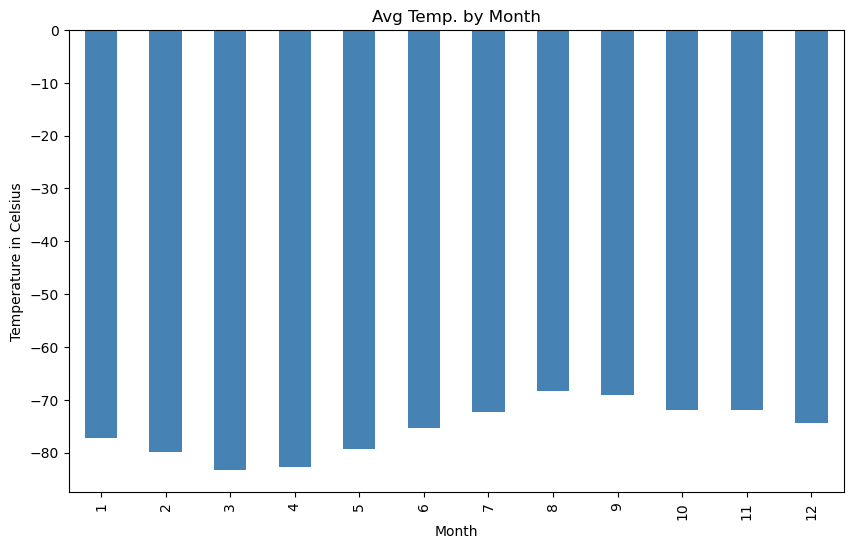

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the average temperature by month
temp_avg = low_temp_avg['min_temp'].mean()

temp_avg_bar = temp_avg.plot(kind="bar", figsize=(10,6), color="steelblue")


plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Avg Temp. by Month")

plt.show()
plt.tight_layout()

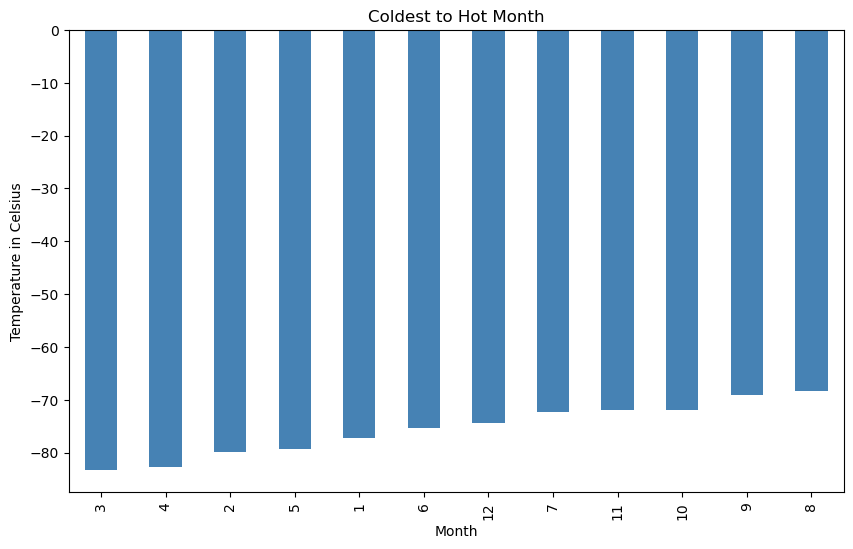

<Figure size 640x480 with 0 Axes>

In [16]:
# Identify the coldest and hottest months in Curiosity's location
cold_hot_month = temp_avg.sort_values()


cold_hot_bar = cold_hot_month.plot(kind="bar", figsize=(10,6), color="steelblue")


plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Coldest to Hot Month")

plt.show()
plt.tight_layout()

In [17]:
# 4. Average pressure by Martian month
pressure_mon = mars_weather_df.groupby('month')
avg_pressure = pressure_mon['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

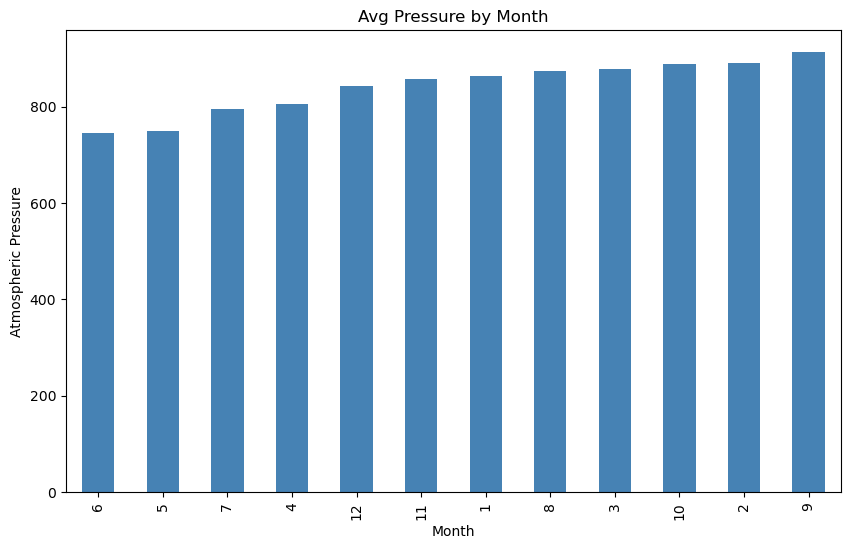

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot the average pressure by month
order_pressure = avg_pressure.sort_values()

avg_press_bar = order_pressure.plot(kind="bar", figsize=(10,6), color="steelblue")


plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Avg Pressure by Month")

plt.show()
plt.tight_layout()

<Axes: xlabel='Number of terrestrial days', ylabel='Minimum Temperature'>

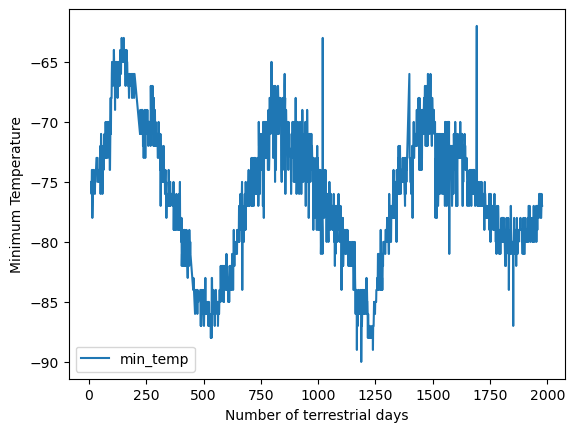

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#earth_days = mars_weather_df.groupby('sol')
terrestrial_days = mars_weather_df.sort_values('sol')

terrestrial_days.plot(x='sol', y='min_temp', xlabel = 'Number of terrestrial days', ylabel = "Minimum Temperature")


In [21]:
# Write the data to a CSV
mars_weather_df.to_csv('data.csv')

In [22]:
# Close the browser
browser.quit()